In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import preprocessing_functions as pf

### you don't have nbextensions, install package below
# pip install jupyter_contrib_nbextensions
# pip install RISE
# jupyter-nbextension install rise --py --sys-prefix
# jupyter-nbextension enable rise --py --sys-prefix

In [6]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

#### Project2 - Classification  
<br></br>
<br></br>
#  Walmart Recruiting
# :Trip Type Classification  
<br></br>
<br></br>
#### A_Team3 
##### 2018.08.11

#### Project2 - Classification
## contents
1. Introduction
    - Project Description
    - EDA  
<br></br>
2. Feature Engineering
    - Filling in missing values & Refining
    - Encoding & Derivation
    - Feature Selection   
<br></br>
3. Modeling & Conclusion
    - Model performance
    - Conclusion

# 1. Introduction
### - Project Description
### - EDA

#### 1.1.1 Project Description - About Competetion
1. Purpose
    - To classify Trip type using only a transactional dataset  
<br></br>
2. Why
    - To help Walmart refine their segmentation process  
<br></br>
4. Limitation
    - Do not use more information than what is given in the data(***Do not use external data***)  

#### 1.1.2 Project Description - Model Summary

|   Model Name  	| n_estimator 	| Max_sample 	| Max_depth 	| Kaggle_Score 	|    Kaggle_Rank   	|                                                         note                                                         	|
|:-------------:	|:-----------:	|:----------:	|:---------:	|:------------:	|:----------------:	|:--------------------------------------------------------------------------------------------------------------------:	|
|  Extra_trees  	|     100     	|      0     	|     50    	|    1.98657   	| 626/1047 (59.8%) 	|                                                        default                                                       	|
|  Extra_trees  	|     100     	|      0     	|    100    	|    1.50736   	| 569/1047 (54.3%) 	|                                                        default                                                       	|
|  [Extra_trees](http://localhost:8888/notebooks/project2/A_Team3/Extratreesclassifier.ipynb)  	|     100     	|      0     	|    200    	|    1.12579   	| 471/1047 (45.0%) 	|                                                        default                                                       	|
| Random Forest 	|     100     	|   default  	|     50    	|    1.45175   	| 554/1047 (52.9%) 	|                                                        default                                                       	|
| Random Forest 	|     100     	|   default  	|    100    	|    1.10170   	| 461/1047 (44.0%) 	|                                                        default                                                       	|
| [Random Forest](http://localhost:8888/notebooks/project2/A_Team3/random%20forest.ipynb) 	|     100     	|   default  	|    200    	|    1.03296   	| 443/1047 (42.3%) 	|                                                        default                                                       	|
|   [Xgboost](http://localhost:8888/notebooks/project2/A_Team3/xgboost.ipynb)    	|     100     	|   default  	|     15    	|    0.68261   	| 223/1047 (21.3%) 	| objective='multi:softprob', eval_metric='mlogloss', learning_rate=0.175234, reg_lambda=0.1790145, reg_alpha=0.230363 	|
|    [Xgboost](http://localhost:8888/notebooks/project2/A_Team3/xgboost_default.ipynb)    	|     100     	|   default  	|     15    	|   **0.67491**   	| **207/1047 (19.8%)** 	|                                                        default                                                       	|

##### 1.2.1. EDA - Datasets
1. Train : Shape : 640,754(rows) × 7(columns)
2. Test : Shape : 653,646(rows) × 6(columns)

In [3]:
train.head(8)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,Friday,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,Friday,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0


In [4]:
test.head(10)

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,1,Friday,7.250339e+10,1,SHOES,3002.0
1,1,Friday,1.707711e+09,1,DAIRY,1526.0
2,1,Friday,8.947000e+10,1,DAIRY,1431.0
3,1,Friday,8.849121e+10,1,GROCERY DRY GOODS,3555.0
4,2,Friday,2.840015e+09,1,DSD GROCERY,4408.0
5,2,Friday,7.874205e+09,1,BAKERY,5019.0
6,2,Friday,8.745860e+10,1,IMPULSE MERCHANDISE,8023.0
7,2,Friday,8.745860e+10,1,IMPULSE MERCHANDISE,8023.0
8,3,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
9,3,Friday,7.410811e+09,-1,PERSONAL CARE,4504.0


##### 1.2.2. EDA - About columns
1. Trip Type
    - Target (what we need to predict)
    - Total 38 types are exists (※ TripType_999 is an "other" category)

In [5]:
train_triptype = train.drop_duplicates("VisitNumber")
x = train_triptype["TripType"]
x = x.value_counts()

Text(0.5,1,'Count of Triptype by VisitNumber')

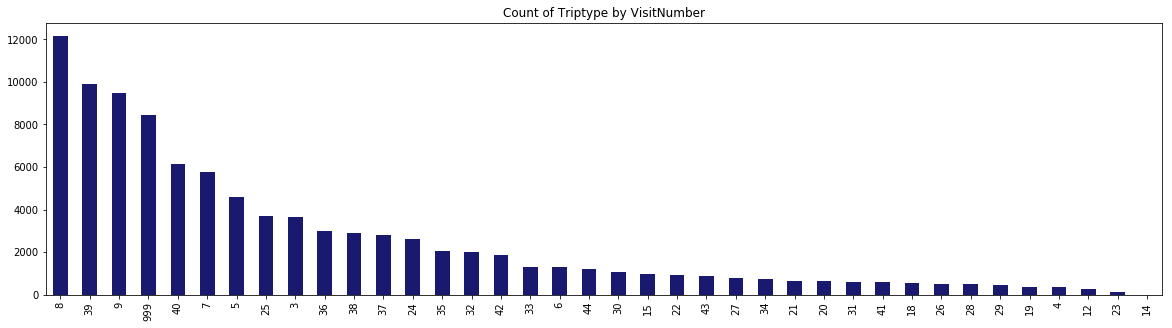

In [6]:
graph = x.plot(kind="bar", figsize=(20, 5), color="midnightblue")
graph.set_title("Count of Triptype by VisitNumber")

##### 1.2.2. EDA - About columns
2. Visit Number
    - An id corresponding to a single trip by a single customer
    - Train & Test dataset has 95674 Visit Number each  
    ***: but there are no intersection between Train & Test Visit Number***


In [7]:
print("Train_VisitNumber: ", len(train.VisitNumber.unique()))
print("Test_VisitNumber: ", len(test.VisitNumber.unique()))

Train_VisitNumber:  95674
Test_VisitNumber:  95674


In [8]:
len(set(train.VisitNumber) & set(test.VisitNumber))

0

##### 1.2.2. EDA - About columns
3. Weekday
    - The weekday of the trip
    - **Each VisitNumber has one kind of Weekday**  

<Figure size 1440x360 with 0 Axes>

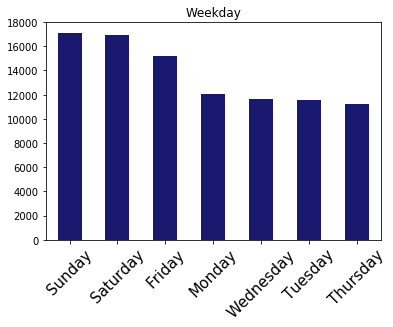

<Figure size 1440x360 with 0 Axes>

In [7]:
x = train.drop_duplicates("VisitNumber")["Weekday"].value_counts()
x.plot(kind="bar", rot=45, title="Weekday", color="midnightblue")
plt.xticks(fontsize=15)
plt.ylabel('', fontsize=16)
plt.figure(figsize=(20, 5))

##### 1.2.2. EDA - About columns
4. UPC
    - The UPC number of the product purchased
    - Range of len(UPC) : 3~12
    - Missing values (4129 rows)


In [10]:
print("Train_UPC: ", len(train.Upc.unique()))
print("Test_UPC: ", len(test.Upc.unique()))

Train_UPC:  97715
Test_UPC:  98148


In [11]:
print("Union: ", len(set(train.Upc) | set(test.Upc)))
print("Interaction: ", len(set(train.Upc) & set(test.Upc)))

Union:  132808
Interaction:  71168


In [12]:
len(set(train.Upc) - set(test.Upc))

30675

In [13]:
len(set(test.Upc) - set(train.Upc))

30965

##### 1.2.2.  EDA - About columns
4. UPC(**Adopting domain knowledge**)
    1. PLU code exists between UPC code
        - PLU is Price look-up codes and it is commonly used in vegetables & fruits
        - PLU length is 4 or 5

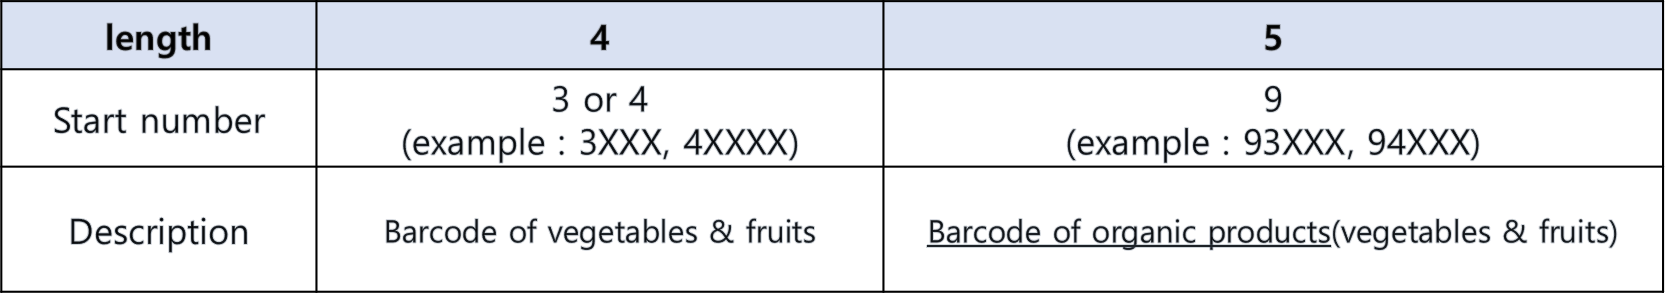

##### 1.2.2.  EDA - About columns
4. UPC(**Adopting domain knowledge**)
    2. Each UPC has own information about  manufacturer & specific product number
        - 2~6 number means manufacturer
        - 7~11 number means product number

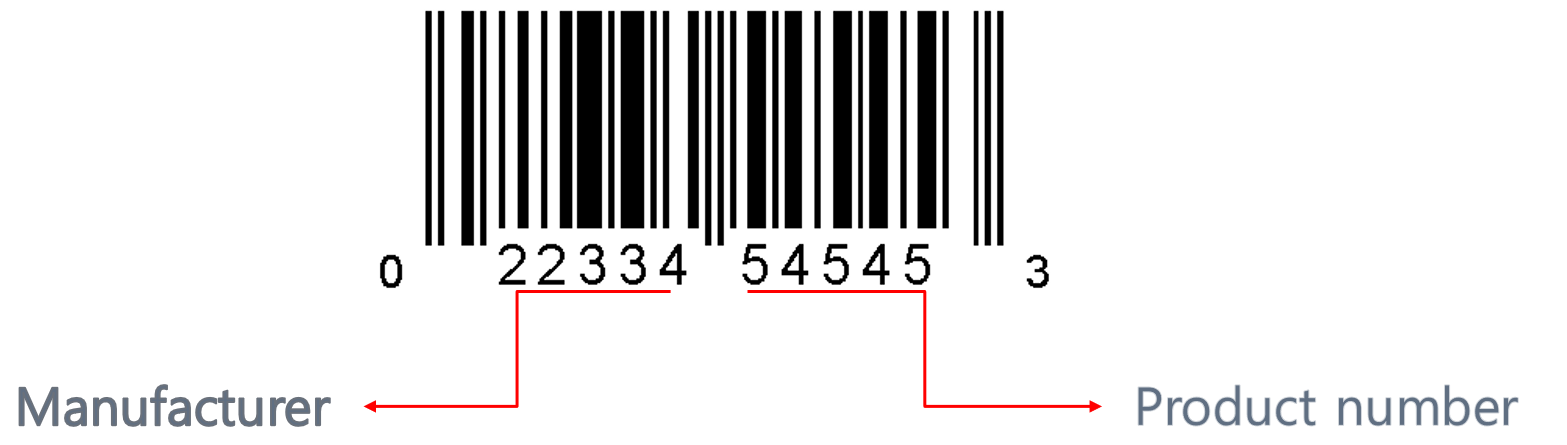

##### 1.2.2.  EDA - About columns
4. DepartmentDescription
    - a high-level description of the item's department
    - 67 types of "DepartmentDescription" (After preprocessing : 'MENSWEAR', 'HEALTH AND BEAUTY AIDS')

<Figure size 1440x360 with 0 Axes>

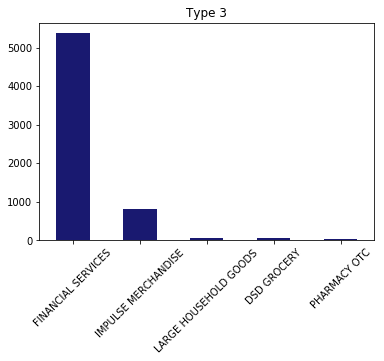

<Figure size 1440x360 with 0 Axes>

In [17]:
type_3 = train[train["TripType"]==3][["TripType","DepartmentDescription"]]
type_3.DepartmentDescription.value_counts().head().plot(kind="bar", rot=45, 
                                        title="Type 3", color="midnightblue")
plt.xticks(fontsize=10)
plt.ylabel('', fontsize=16)
plt.figure(figsize=(20, 5))

<Figure size 1440x360 with 0 Axes>

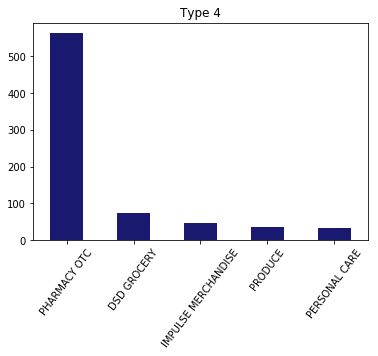

<Figure size 1440x360 with 0 Axes>

In [18]:
type_4 = train[train["TripType"]==4][["TripType","DepartmentDescription"]]
type_4.DepartmentDescription.value_counts().head().plot(kind="bar", rot=53, 
                                        title="Type 4", color="midnightblue")
plt.xticks(fontsize=10)
plt.ylabel('', fontsize=16)
plt.figure(figsize=(20, 5))

##### 1.2.2. EDA - About columns
5. Scan Count
    - the number of the given item that was purchased. A negative value indicates a product return.
    - Sum of Scan Count by VisitNumber is significant

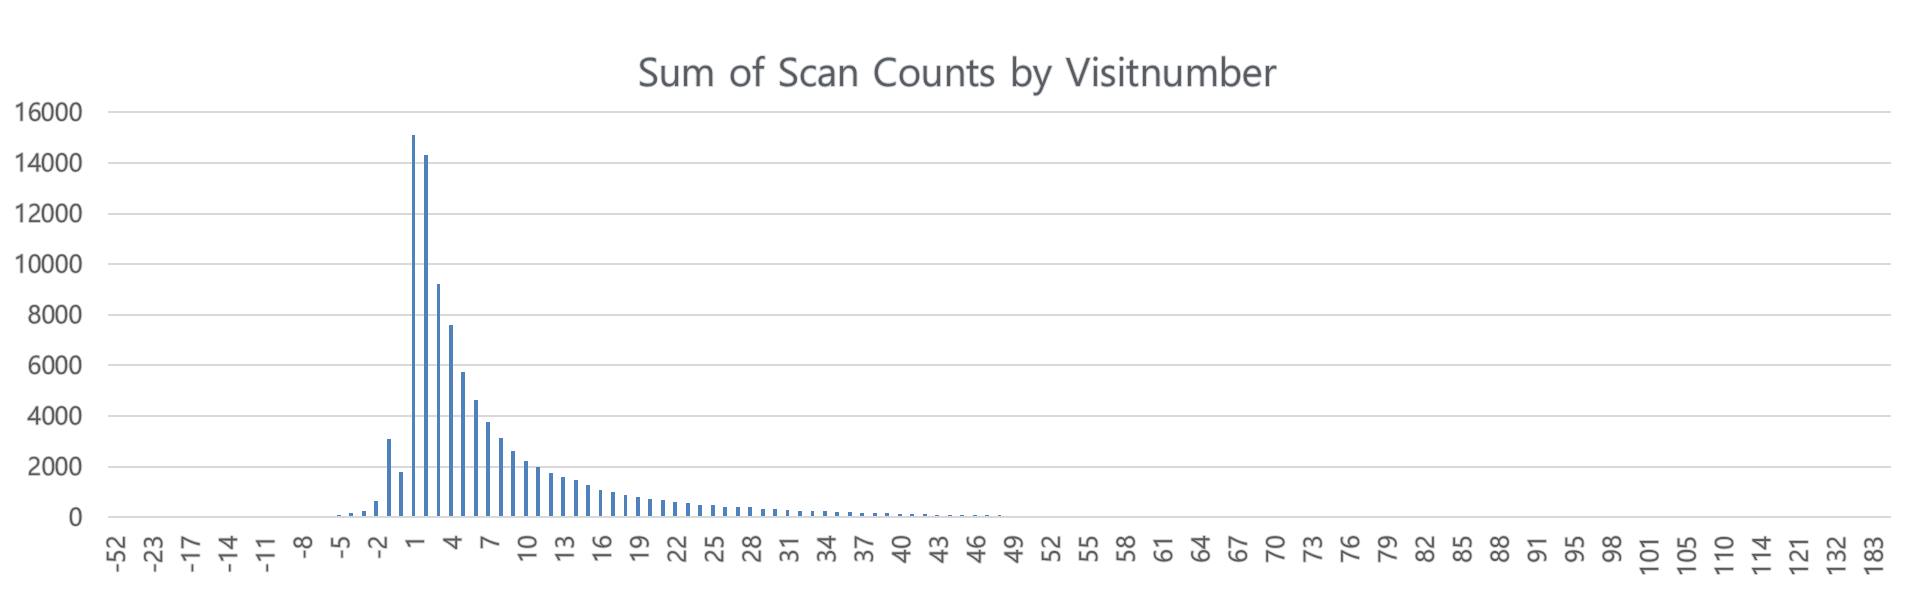

##### 1.2.2.  EDA - About columns
5. FinelineNumber
    - “Fineline” refers to a group of items **within a department** which show similar sales patterns  
         → FinelineNumbers are Duplicated in different department descriptions
       ##### So, Interaction between Fineline & Department description is more meaningful

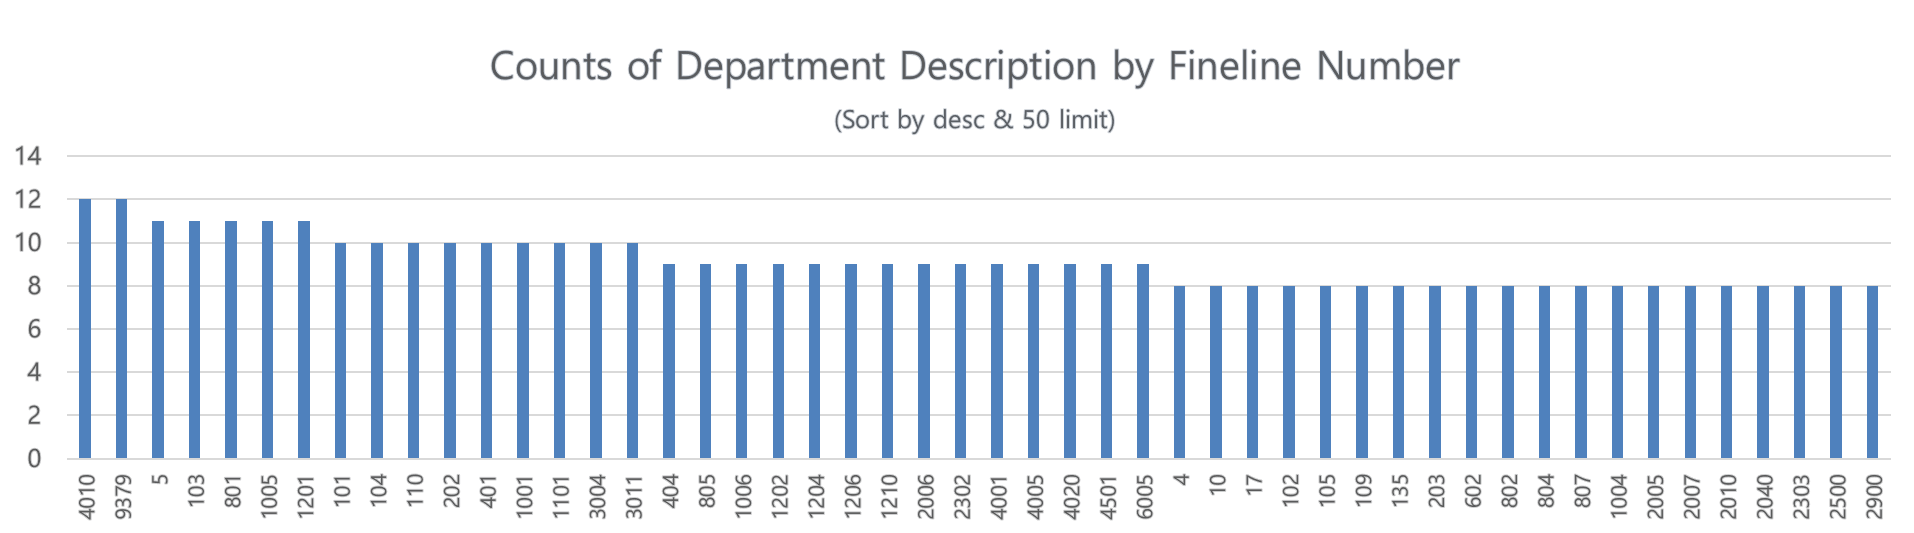

##### 1.2.2. EDA - About columns
4. FinelineNumber(**Adopting domain knowledge**)
    - FinelineNumber is connected “SKUs” and “categories”

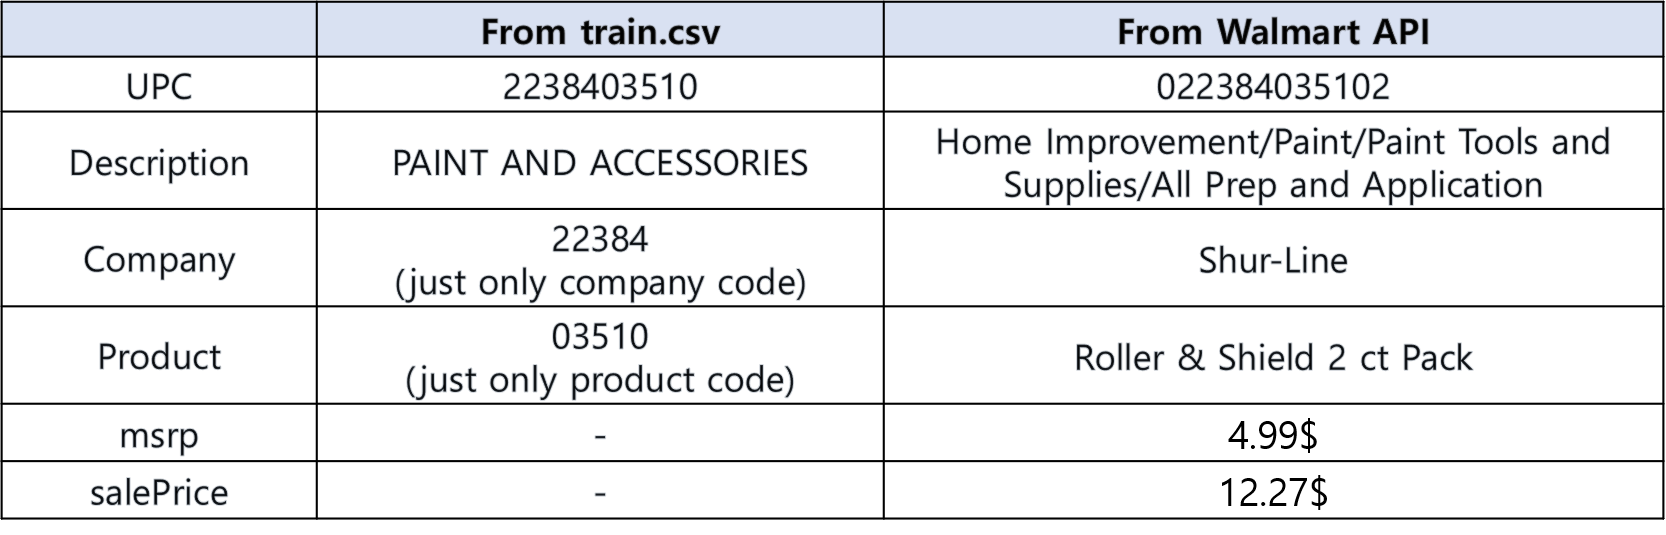
###  → We didn't use walmart api to our dataset because of limitation

# 2. Feature Engineering
- Filling missing values & Refining
    - Type1 - Department Description = “Null”
    - Type2 - Department Description = “PHARMACY RX”
- Encoding & Derivation
- Feature Selection

##### 2.1.1.  Feature Engineering -  Filling missing values
1. Type1 - Department Description = “Null”

 - There are 1361 rows which have missing values  
 - We can classify into two cases  
    - Case Ⅰ : VisitNumbers have another rows whose description is not “Null” -> 1297 rows
    - Case Ⅱ : VisitNumbers only have rows whose description is “Null” -> 191 rows  
        → All of Trip Types are “999” (100%)

### Assumption :
    - Case Ⅰ : We can fill missing values (Fineline&Description&UPC) with mode by visitnumber
    - Case Ⅱ : We can fill missing values (Fineline&Description&UPC) with specific number
**※ which is not duplicated with other numbers**

##### 2.1.1.  Feature Engineering -  Filling missing values
2. Type2 - Department Description = “PHARMACY RX”

 - There are 2768 rows which have missing values  
    → Trip types are mainly “5” (92.9%)
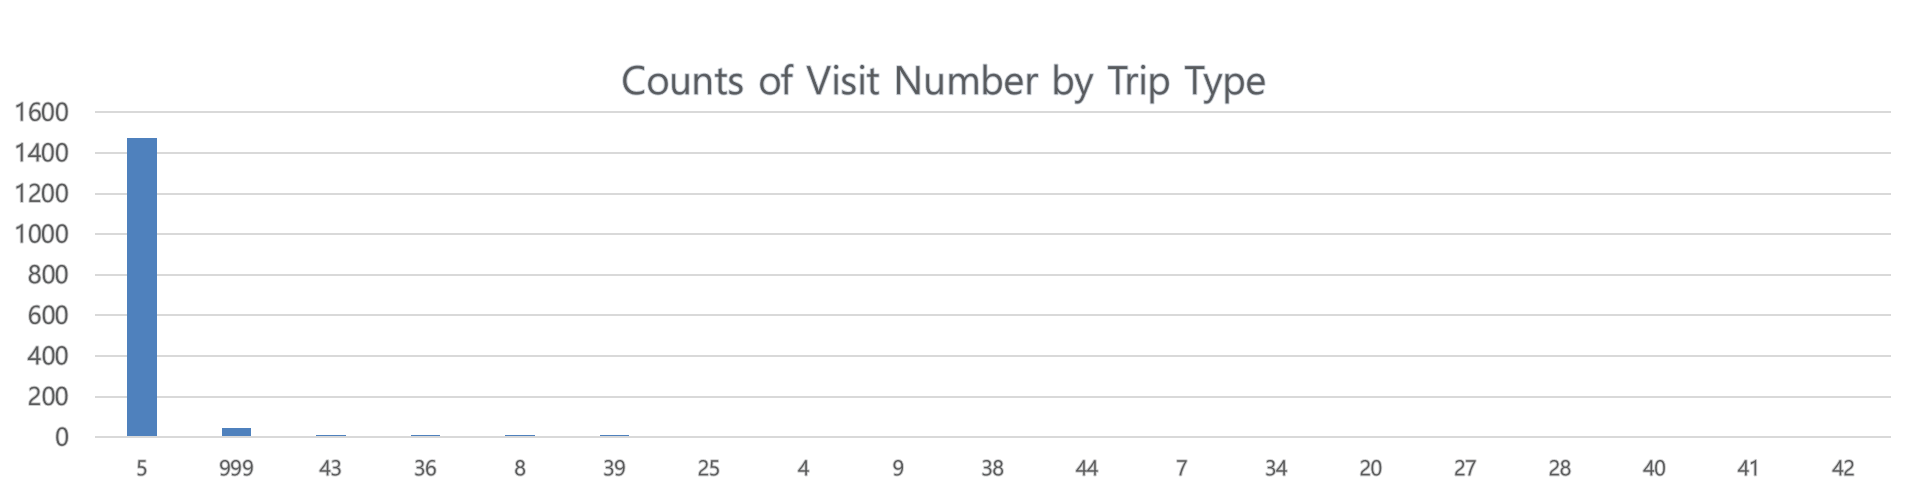

### Assumption :
    - We can fill missing values (Fineline&UPC) with mode value of “PHARMACY RX”

#### Summary(filling missing values)
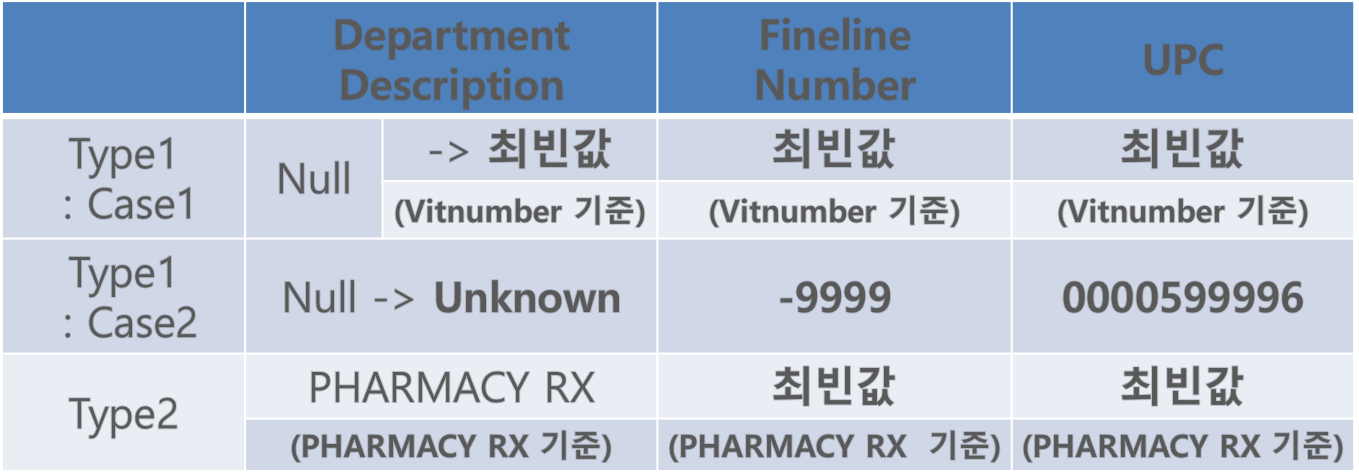

##### 2.1.2.  Feature Engineering - Refining
1. (Department Description)"MENSWEAR" change to "MENS WEAR"
2. (Department Description)"HEALTH AND BEAUTY AIDS" change to "BEAUTY"
3. Divde Upc to Company and Product
    - 3~12자리의 여러자기 종류의 UPC를 모두 12자리로 복원 후, 필요한 부분은 company_Upc와 product_Upc로 나누어 인코딩

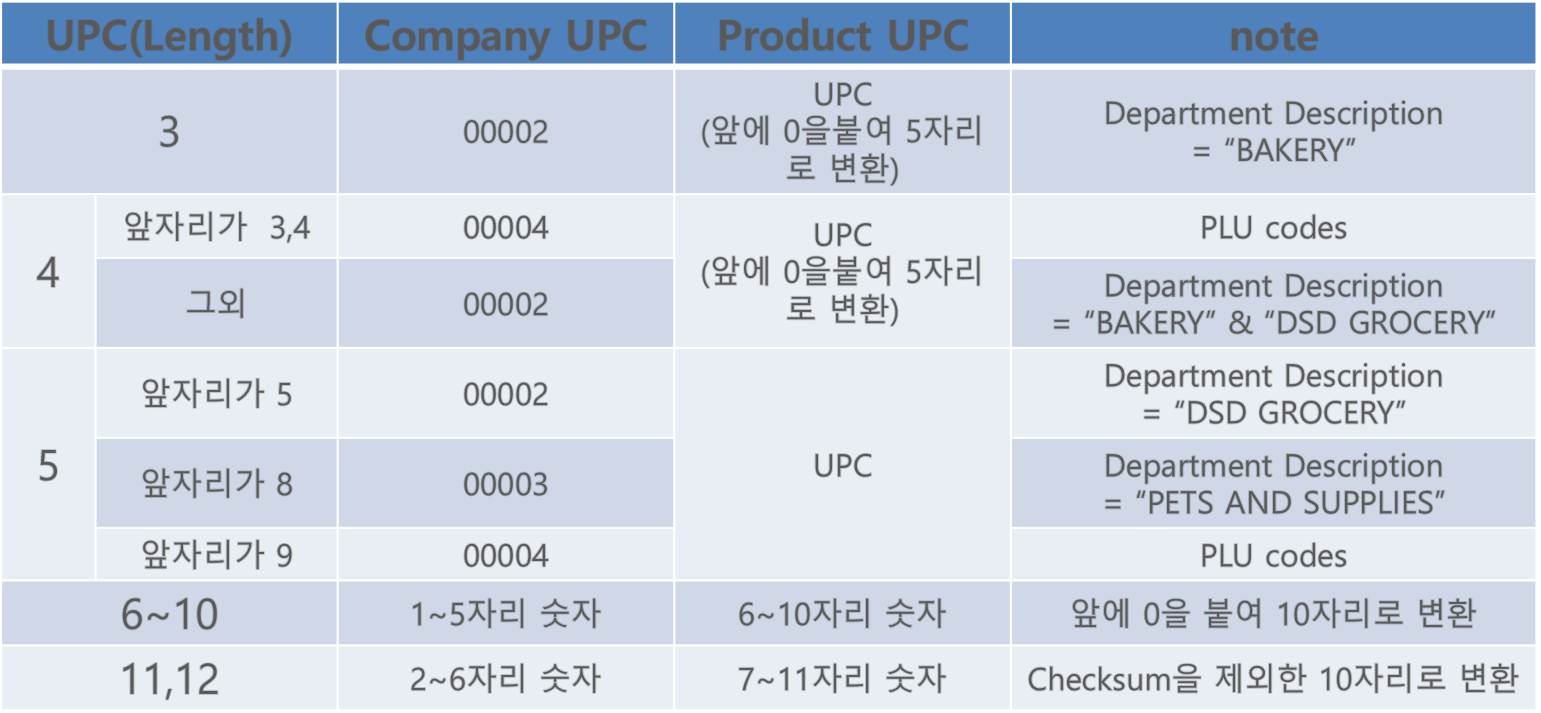

### Missing Value

### DepartmentDescription
- VisitNumber에 따른 DepartmentDescription의 최빈값으로 DepartmentDescription의 빈값 채우기
- 유추할 수 없는 191개의 값은 'UNKNOWN' 으로 대체
- "MENSWEAR" change to "MENS WEAR"
- "HEALTH AND BEAUTY AIDS" change to "BEAUTY"

In [19]:
train.loc[train["VisitNumber"]==259, "DepartmentDescription"]

546        LAWN AND GARDEN
547        LAWN AND GARDEN
548                    NaN
549                    NaN
550        LAWN AND GARDEN
551        LAWN AND GARDEN
552    IMPULSE MERCHANDISE
Name: DepartmentDescription, dtype: object

In [20]:
DD_VN_list = train[train["DepartmentDescription"].isna()]["VisitNumber"].unique()

In [21]:
for loc in tqdm(DD_VN_list): # if: 특정 VisitNumber 따른 DepartmentDescription 값이 모두 비어있는 경우 제외
    if len(train[train["VisitNumber"] == loc]["DepartmentDescription"].value_counts().index) != 0:
        train.loc[(train["VisitNumber"] == loc)&(train["DepartmentDescription"].isna()), "DepartmentDescription"] = train[train["VisitNumber"] == loc]["DepartmentDescription"].value_counts().index[0]

100%|██████████████████████████████████████████████████████████████████████████████| 1172/1172 [00:46<00:00, 25.34it/s]


In [22]:
train.loc[train["VisitNumber"]==259, "DepartmentDescription"]

546        LAWN AND GARDEN
547        LAWN AND GARDEN
548        LAWN AND GARDEN
549        LAWN AND GARDEN
550        LAWN AND GARDEN
551        LAWN AND GARDEN
552    IMPULSE MERCHANDISE
Name: DepartmentDescription, dtype: object

#### "MENSWEAR" change to "MENS WEAR"

In [23]:
train.loc[train["DepartmentDescription"] == "MENSWEAR", "DepartmentDescription"] = "MENS WEAR"
train[train["DepartmentDescription"] == "MENSWEAR"]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


#### "HEALTH AND BEAUTY AIDS" change to "BEAUTY"

In [24]:
train.loc[train["DepartmentDescription"] == "HEALTH AND BEAUTY AIDS", "DepartmentDescription"] = "BEAUTY"
train[train["DepartmentDescription"] == "HEALTH AND BEAUTY AIDS"]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


### FinelineNumber
- DepartmentDescription이 'PHARMACY RX'인 빈값이 들어있는 FinelineNumber에는 DepartmentDescription이 'PHARMACY RX'일때의 FinelineNumber의 최빈값으로 채워준다.
- VisitNumber에 따른 FinelineNumber의 최빈값으로 FinelineNumber의 빈값 채우기
- 191개의 유추할 수 없는 값은 기존에 있던 값과 중복되지 않는 -9999 값으로 대체

In [25]:
train[train["DepartmentDescription"] == 'PHARMACY RX']["FinelineNumber"].value_counts()

4822.00    84
5615.00    63
1335.00     6
1336.00     1
Name: FinelineNumber, dtype: int64

In [26]:
Pharmacy_idx = train[train["DepartmentDescription"]=='PHARMACY RX'].index
number_idx = np.arange(2922)
idx_box = zip(number_idx, Pharmacy_idx)


for idx, Pha_idx in tqdm(idx_box):
    if idx % 2 == 0:
        train.loc[Pha_idx, "FinelineNumber"] = 4822.0
    else:
        train.loc[Pha_idx, "FinelineNumber"] = 5615.0
        
train[train["DepartmentDescription"] == 'PHARMACY RX'][["DepartmentDescription", "FinelineNumber"]].head()

2922it [00:18, 154.72it/s]


,DepartmentDescription,FinelineNumber
1155,PHARMACY RX,4822.00
1216,PHARMACY RX,5615.00
1373,PHARMACY RX,4822.00
1455,PHARMACY RX,5615.00
1456,PHARMACY RX,4822.00


In [27]:
train.loc[train["VisitNumber"]==259, "FinelineNumber"]

546   5141.00
547   1748.00
548       nan
549       nan
550   2605.00
551   2605.00
552    337.00
Name: FinelineNumber, dtype: float64

In [28]:
FN_VN_list = train[train["FinelineNumber"].isna()]["VisitNumber"].unique()

In [29]:
for loc in tqdm(FN_VN_list): # if: 특정 VisitNumber 따른 FinelineNumber 값이 모두 비어있는 경우 제외
    if len(train[train["VisitNumber"] == loc]["FinelineNumber"].value_counts().index) != 0:
        train.loc[(train["VisitNumber"] == loc)&(train["FinelineNumber"].isna()), "FinelineNumber"] = train[train["VisitNumber"] == loc]["FinelineNumber"].value_counts().index[0]

100%|██████████████████████████████████████████████████████████████████████████████| 1172/1172 [00:15<00:00, 76.44it/s]


In [30]:
train.loc[train["VisitNumber"]==259, "FinelineNumber"]

546   5141.00
547   1748.00
548   2605.00
549   2605.00
550   2605.00
551   2605.00
552    337.00
Name: FinelineNumber, dtype: float64

### Upc
- DepartmentDescription이 'PHARMACY RX'인 빈값이 들어있는 Upc에는 DepartmentDescription이 'PHARMACY RX'일때의 Upc의 최빈값으로 채워준다.
- VisitNumber에 따른 Upc의 최빈값으로 Upc의 빈값 채우기
- 191개의 유추할 수 없는 값은 기존에 있던 값과 중복되지 않는 '0000599996' 값으로 대체

In [31]:
train.loc[train["VisitNumber"]==259, "Upc"]

546   7112175715.00
547   4656117978.00
548             nan
549             nan
550   3146256088.00
551   3146252618.00
552   4650073175.00
Name: Upc, dtype: float64

In [32]:
Upc_VN_list = train[train["Upc"].isna()]["VisitNumber"].unique()

In [33]:
for loc in tqdm(Upc_VN_list): # if: 특정 VisitNumber 따른 Upc 값이 모두 비어있는 경우 제외
    if len(train[train["VisitNumber"] == loc]["Upc"].value_counts().index) != 0:
        train.loc[(train["VisitNumber"] == loc)&(train["Upc"].isna()), "Upc"] = train[train["VisitNumber"] == loc]["Upc"].value_counts().index[0]

100%|█████████████████████████████████████████████████████████████████████████████| 2754/2754 [00:21<00:00, 125.70it/s]


In [34]:
train.loc[train["VisitNumber"]==259, "Upc"]

546   7112175715.00
547   4656117978.00
548   4656117978.00
549   4656117978.00
550   3146256088.00
551   3146252618.00
552   4650073175.00
Name: Upc, dtype: float64

##### VisitNumber에 따른 모든 DepartmentDescription, FinelineNumber, Upc의 값이 비어있는 경우

- 총 191 개의 유추 불가능한 DepartmentDescription, FinelineNumber, Upc의 값이 모두 비어있는 경우
- 기존에 train, test 데이터에 없는 값으로 각각 "UNKNOWN", -9999, '0000599996' 채운다.

In [35]:
empty_df = train[(train["DepartmentDescription"].isna())&(train["DepartmentDescription"].isna())&(train["DepartmentDescription"].isna())][["VisitNumber", "DepartmentDescription", "FinelineNumber", "Upc", "TripType", "Weekday", "ScanCount"]]

print(empty_df.shape)
empty_df[["DepartmentDescription", "FinelineNumber", "Upc"]].head()

(191, 7)


,DepartmentDescription,FinelineNumber,Upc
959,NaN,nan,nan
1134,NaN,nan,nan
1135,NaN,nan,nan
6285,NaN,nan,nan
8524,NaN,nan,nan


In [36]:
print("191개의 빈 row들은 모두 triptype이 {}이다.".format(empty_df["TripType"].value_counts().index[0]))
empty_df["TripType"].value_counts()

191개의 빈 row들은 모두 triptype이 999이다.


999    191
Name: TripType, dtype: int64

In [37]:
train.loc[train["DepartmentDescription"].isna(), "DepartmentDescription"] = "UNKNOWN"
train[train["DepartmentDescription"].isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


In [38]:
train.loc[train["FinelineNumber"].isna(), "FinelineNumber"] = -9999.0
train[train["FinelineNumber"].isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


In [39]:
train.loc[train["Upc"].isna(), "Upc"] = 0000599996.0
train[train["Upc"].isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


##### Divde Upc to Company and Product

- 3~12자리의 여러자기 종류의 UPC를 모두 12자리로 복원 후, 필요한 부분은 company_Upc와 product_Upc로 나누어 인코딩

In [40]:
train["Upc"] = train["Upc"].astype(str)

In [41]:
train["full_Upc"] = train["Upc"].apply(pf.upc_789101112_to_10)
train["full_Upc"] = train["full_Upc"].apply(pf.upc_3456_to_10)

train["company_Upc"] = train["full_Upc"].apply(pf.company_part_Upc)
train["product_Upc"] = train["full_Upc"].apply(pf.product_part_Upc) 

train[["Upc", "full_Upc", "company_Upc", "product_Upc"]].tail()

,Upc,full_Upc,company_Upc,product_Upc
647049,32390001778.0,2390001778,23900,01778
647050,7874205336.0,7874205336,78742,05336
647051,4072.0,0000404072,00004,04072
647052,4190007664.0,4190007664,41900,07664
647053,3800059655.0,3800059655,38000,59655


##### 2.2.1  Feature Engineering - Encoding
1. Count the DepartmentDescription for each VisitNumber

In [42]:
train_department = pd.pivot_table(data=train, index='VisitNumber', columns='DepartmentDescription', values='ScanCount', aggfunc='sum')
train_department = train_department.fillna(0)
train_department.head()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,UNKNOWN,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


##### 2.2.1  Feature Engineering - Encoding
2. Count the Weekday for each VisitNumber

In [43]:
train_weekday = pd.pivot_table(data=train, index='VisitNumber', columns='Weekday', values='ScanCount', aggfunc=lambda x : np.mean(x/x))
train_weekday = train_weekday.fillna(0)
train_weekday.head()

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
VisitNumber,,,,,,,
5,1.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1.00,0.00,0.00,0.00,0.00,0.00,0.00
10,1.00,0.00,0.00,0.00,0.00,0.00,0.00


##### 2.2.1  Feature Engineering - Encoding
3. Count the FinelineNumber for each VisitNumber

In [44]:
train_fineline = pd.pivot_table(data=train, index='VisitNumber', columns='FinelineNumber', values='ScanCount', aggfunc='sum')
train_fineline = train_fineline.fillna(0)
train_fineline.head()

FinelineNumber,-9999.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,9964.0,9966.0,9967.0,9970.0,9971.0,9974.0,9975.0,9991.0,9997.0,9998.0
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


##### 2.2.1  Feature Engineering - Encoding
4. Count the company_Upc for each VisitNumber

In [45]:
train["company_Upc"] = train["company_Upc"].astype('str')
train_company_upc = pd.pivot_table(data=train, index='VisitNumber', columns='company_Upc', values='ScanCount', aggfunc='sum')
train_company_upc = train_company_upc.fillna(0)
train_company_upc.head()

company_Upc,00001,00002,00003,00004,00005,00008,00049,00050,00054,00055,...,99804,99829,99870,99919,99923,99928,99939,99967,99988,99991
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


##### 2.2.1  Feature Engineering - Encoding
5.  Concat above column

In [46]:
train_df = pd.concat([train_department, train_fineline, train_company_upc, train_weekday], axis=1)
print(train_df.shape)
train_df.tail()

(95674, 10954)


,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,99967,99988,99991,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
VisitNumber,,,,,,,,,,,,,,,,,,,,,
191343,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
191344,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
191345,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
191346,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
191347,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


##### 2.2.2  Feature Engineering - Derivation
1. Add column -> abs_ScanCount

In [47]:
train["abs_ScanCount"] = np.abs(train["ScanCount"])
train_abs_ScanCount = train.groupby(by="VisitNumber").sum().reset_index()["abs_ScanCount"]
train_abs_ScanCount.head()

0     1
1     2
2    32
3     3
4     3
Name: abs_ScanCount, dtype: int64

In [48]:
train_ScanCount = train.groupby(by="VisitNumber").sum().reset_index()["ScanCount"]
train_ScanCount.head()

0    -1
1     2
2    28
3     3
4     3
Name: ScanCount, dtype: int64

##### 2.2.2  Feature Engineering - Derivation
2. Divide by abs_scancount for each columns
    - ScanCount로 각 컬럼을 나눠 산 물건 종류의 비율을 할당
    - 절대값 사용 이유는 한번 샀다가 환불한 경우도 구매했던 이력으로 간주

In [49]:
train_df = train_df.reset_index(drop=False)
train_df["abs_ScanCount"] = train_abs_ScanCount

train_columns = [x for x in train_df.columns if x not in train_weekday.columns]

for col_name in tqdm(train_columns):
    train_df[col_name] = train_df[col_name] / train_df["abs_ScanCount"]

100%|██████████████████████████████████████████████████████████████████████████| 10949/10949 [00:08<00:00, 1244.56it/s]


##### 2.2.2  Feature Engineering - Derivation
3. Refund rate
    - 999타입은 대부분이 환불 고객이며, 환불 비율이 Trip type에 영향을 미친다고 생각  -> 파생 Column 생성

In [50]:
train_df["ScanCount"] = train_ScanCount
train_df["refund_rate"] = ((train_abs_ScanCount - train_ScanCount) / 2) / train_abs_ScanCount
train_df["refund_rate"].head()

0   1.00
1   0.00
2   0.06
3   0.00
4   0.00
Name: refund_rate, dtype: float64

##### 2.3  Feature Engineering - Feature Selection  
 - train, test 중복되는 company_upc, finelinenumber만 사용  
 
 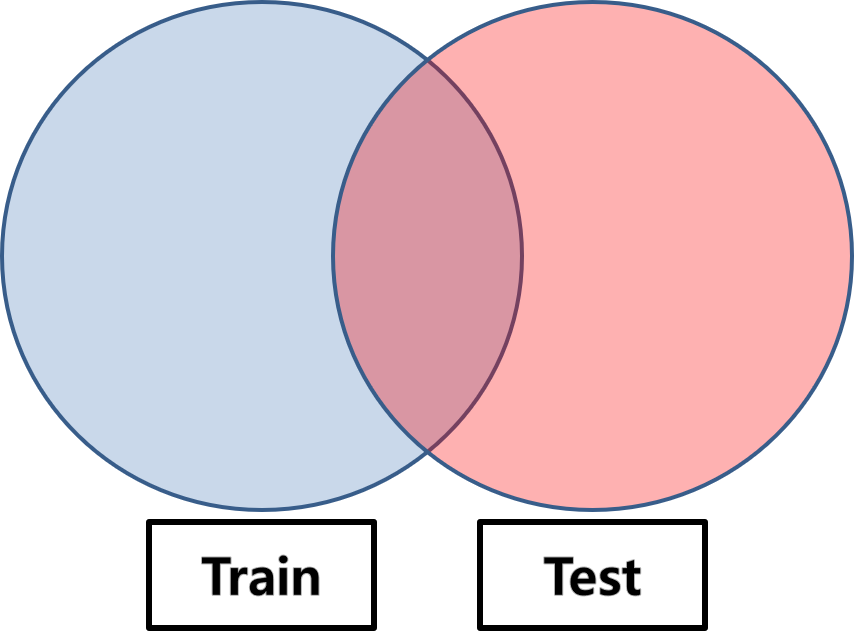

##### 2.3  Feature Engineering - Feature Selection  
1. X_train

In [3]:
X_train = pd.read_csv("modeling_df/train_df.csv")

print(X_train.shape)
X_train.tail()

(95674, 10425)


,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,8172.0,8173.0,8175.0,8176.0,1625.0,8180.0,8190.0,8191.0,ScanCount,refund_rate
95669,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.0
95670,0.0,0.0,0.0,0.0,0.0,0.800000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0
95671,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,0.0
95672,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,0.0
95673,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0


##### 2.3  Feature Engineering - Feature Selection  
2. X_test

In [4]:
X_test = pd.read_csv("modeling_df/test_df.csv")

print(X_test.shape)
X_test.tail()

(95674, 10425)


,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,8172.0,8173.0,8175.0,8176.0,1625.0,8180.0,8190.0,8191.0,ScanCount,refund_rate
95669,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.0
95670,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0
95671,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0
95672,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.0
95673,0.0,0.0,0.000000,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0


##### 2.3  Feature Engineering - Feature Selection  
3. Y_train

In [8]:
y_train = train.groupby(by="VisitNumber").mean().reset_index()["TripType"]

print(y_train.shape)
y_train[:5]

(95674,)


0    999.0
1     30.0
2     26.0
3      8.0
4      8.0
Name: TripType, dtype: float64

# 3. Modeling & Conclusion
### - Model performance
### - Conclusion

##### 3.1.  Model Perfomance

|   Model Name  	| n_estimator 	| Max_sample 	| Max_depth 	| Kaggle_Score 	|    Kaggle_Rank   	|                                                         note                                                         	|
|:-------------:	|:-----------:	|:----------:	|:---------:	|:------------:	|:----------------:	|:--------------------------------------------------------------------------------------------------------------------:	|
|  Extra_trees  	|     100     	|      0     	|     50    	|    1.98657   	| 626/1047 (59.8%) 	|                                                        default                                                       	|
|  Extra_trees  	|     100     	|      0     	|    100    	|    1.50736   	| 569/1047 (54.3%) 	|                                                        default                                                       	|
|  [Extra_trees](http://localhost:8888/notebooks/project2/A_Team3/Extratreesclassifier.ipynb)  	|     100     	|      0     	|    200    	|    1.12579   	| 471/1047 (45.0%) 	|                                                        default                                                       	|
| Random Forest 	|     100     	|   default  	|     50    	|    1.45175   	| 554/1047 (52.9%) 	|                                                        default                                                       	|
| Random Forest 	|     100     	|   default  	|    100    	|    1.10170   	| 461/1047 (44.0%) 	|                                                        default                                                       	|
| [Random Forest](http://localhost:8888/notebooks/project2/A_Team3/random%20forest.ipynb) 	|     100     	|   default  	|    200    	|    1.03296   	| 443/1047 (42.3%) 	|                                                        default                                                       	|
|   [Xgboost](http://localhost:8888/notebooks/project2/A_Team3/xgboost.ipynb)    	|     100     	|   default  	|     15    	|    0.68261   	| 223/1047 (21.3%) 	| objective='multi:softprob', eval_metric='mlogloss', learning_rate=0.175234, reg_lambda=0.1790145, reg_alpha=0.230363 	|
|    [Xgboost](http://localhost:8888/notebooks/project2/A_Team3/xgboost_default.ipynb)    	|     100     	|   default  	|     15    	|    0.67491   	| 207/1047 (19.8%) 	|                                                        default                                                       	|

#### Extra_trees depth 50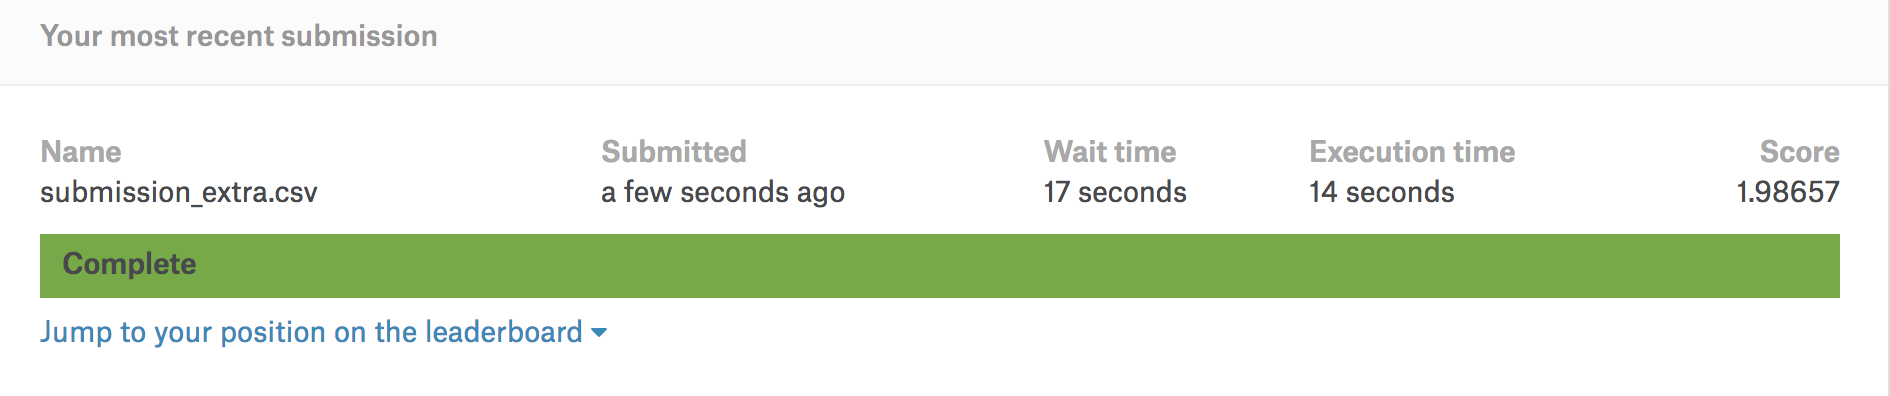

#### Extra_trees depth 100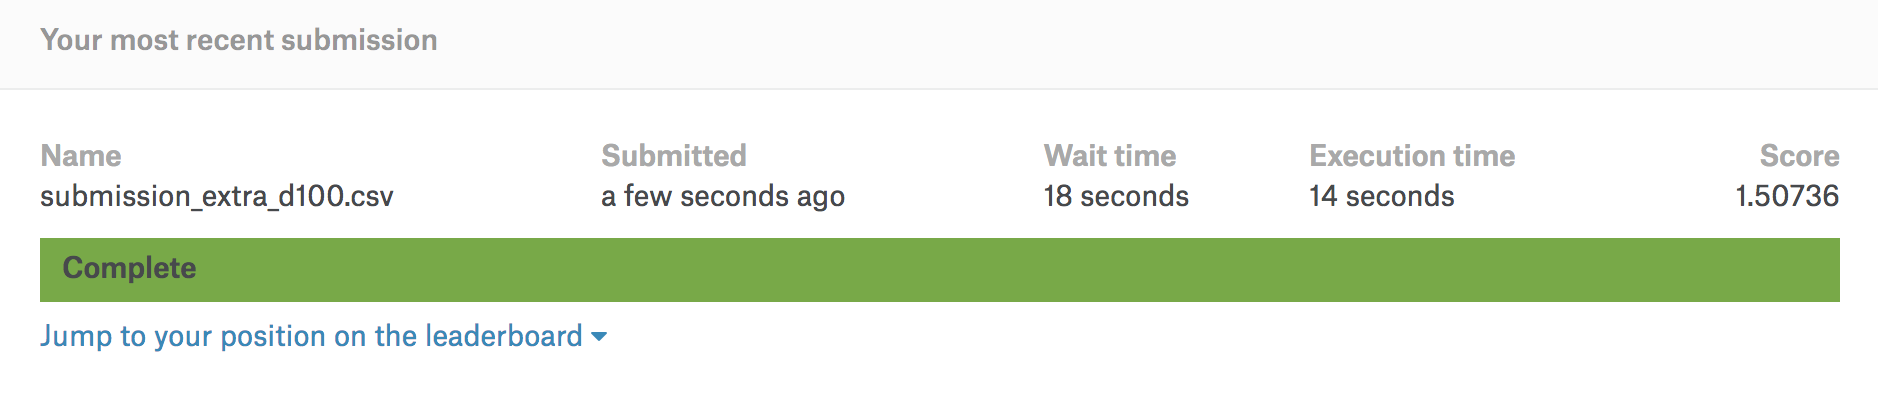

#### Extra_trees depth 200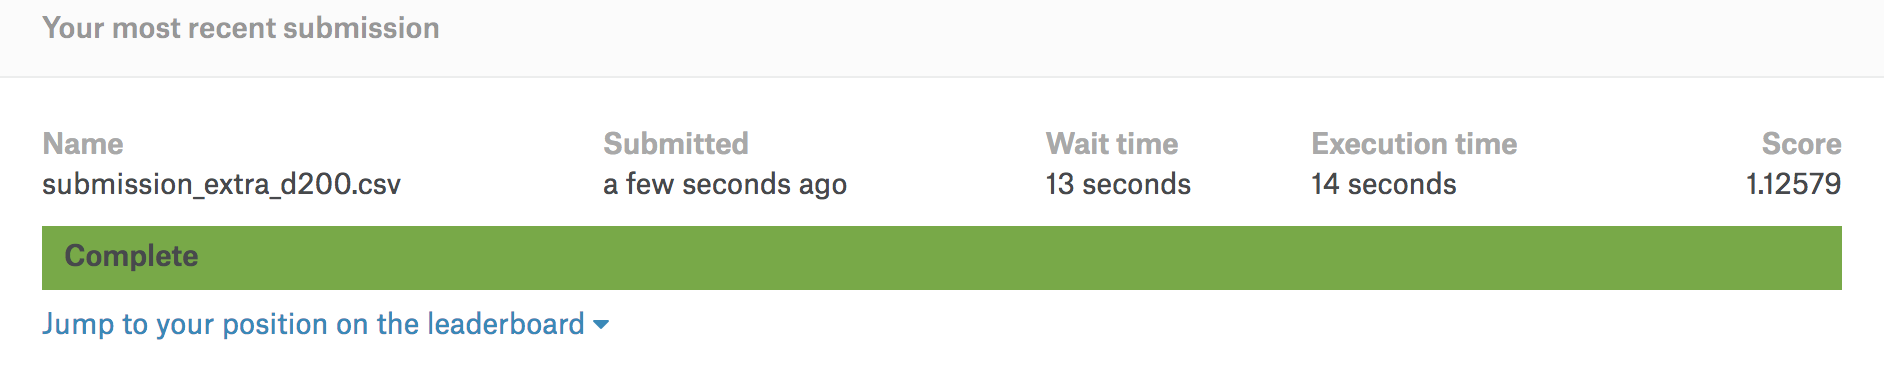

#### random forest depth 50
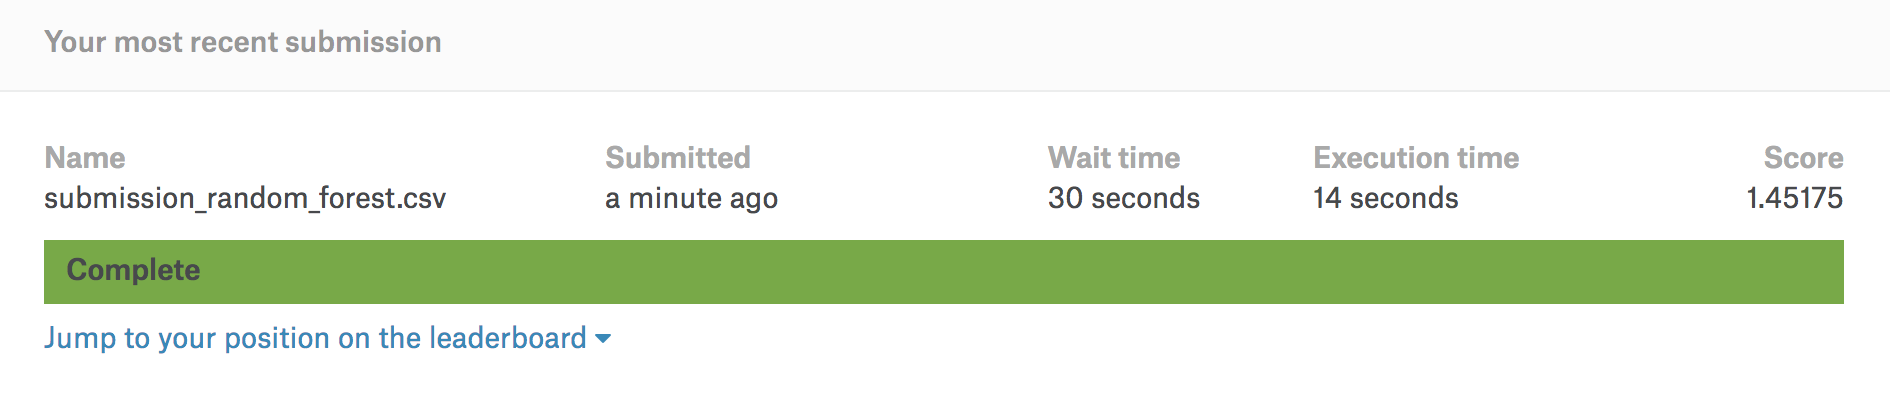

#### random forest depth 100
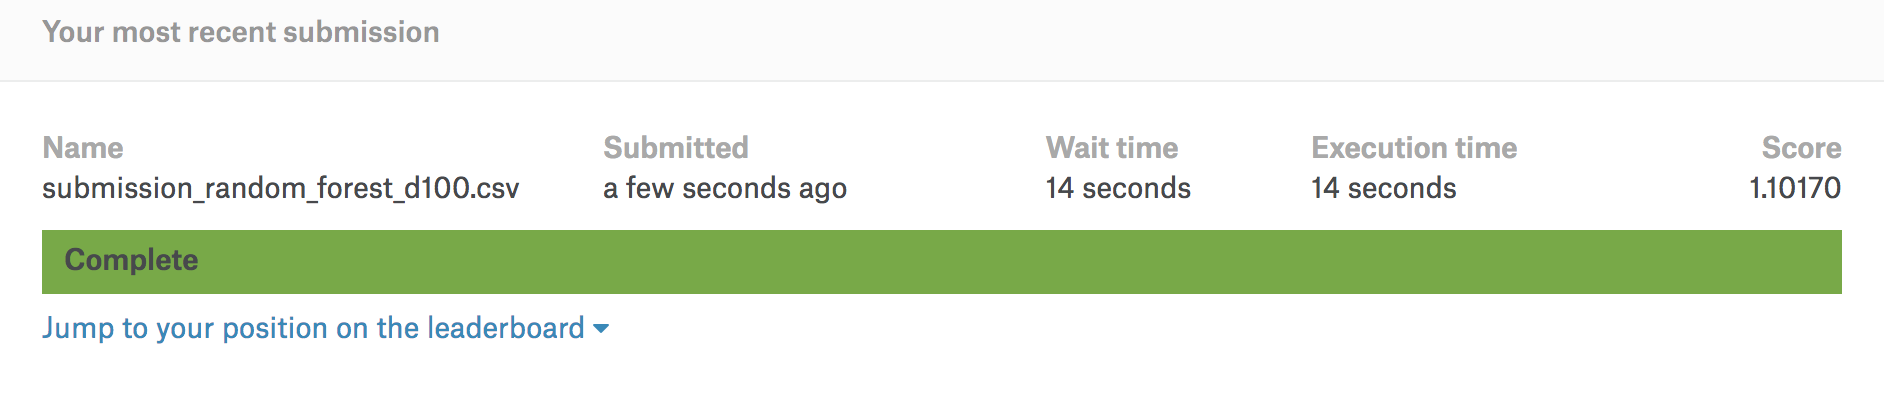

#### random forest depth 200
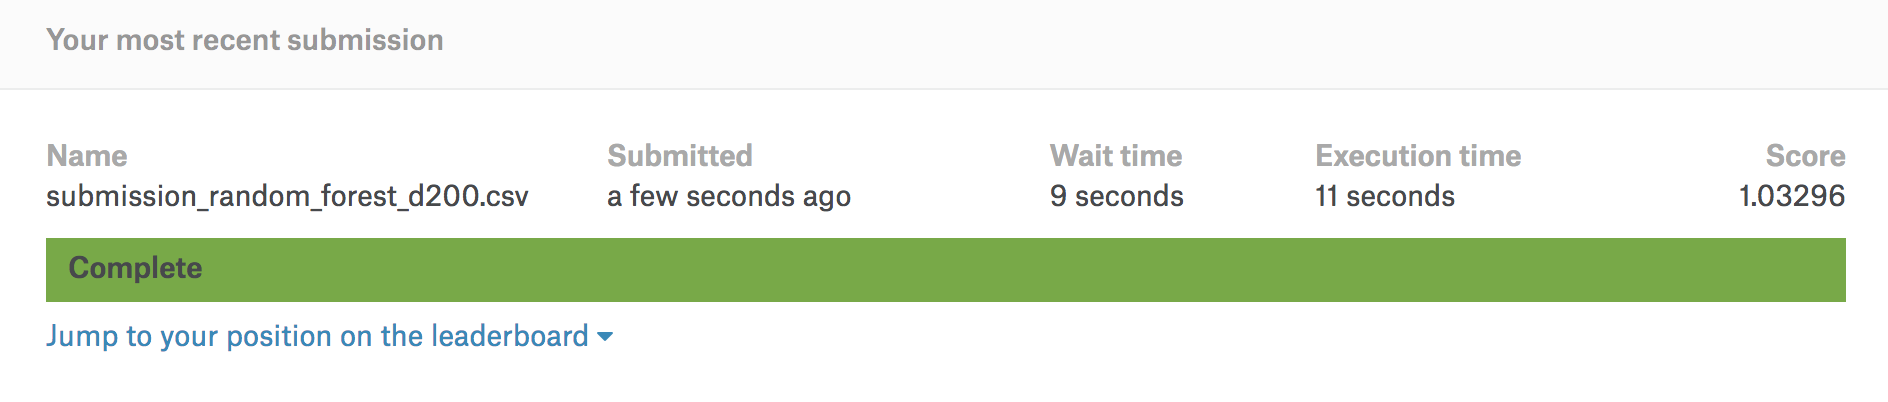

#### xgboost depth 15, "objective='multi:softprob', eval_metric='mlogloss', learning_rate=0.175234, reg_lambda=0.1790145, reg_alpha=0.230363"
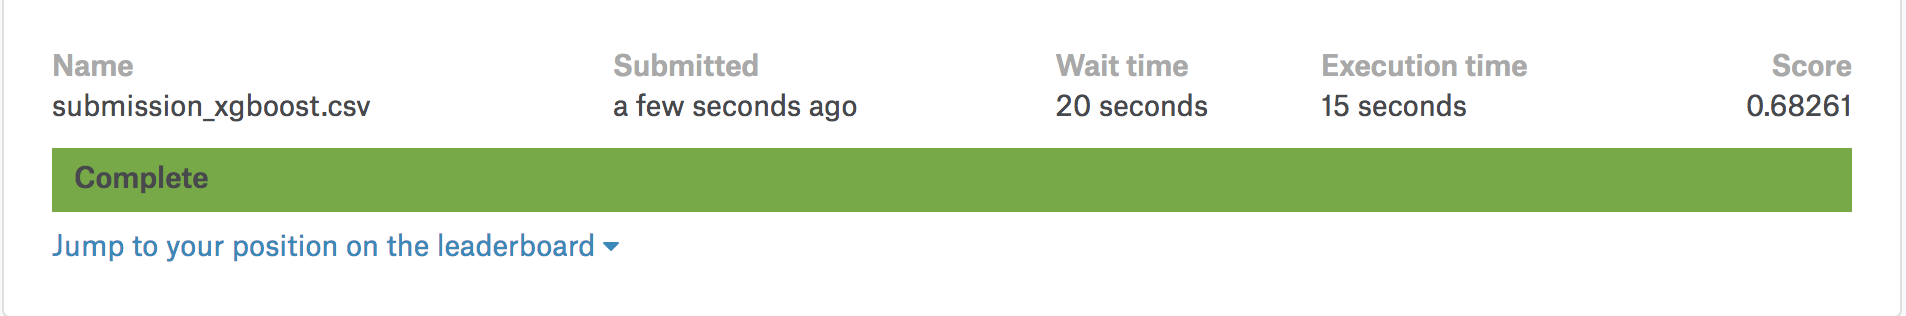

#### xgboost depth 15, default parameter  
<br></br>
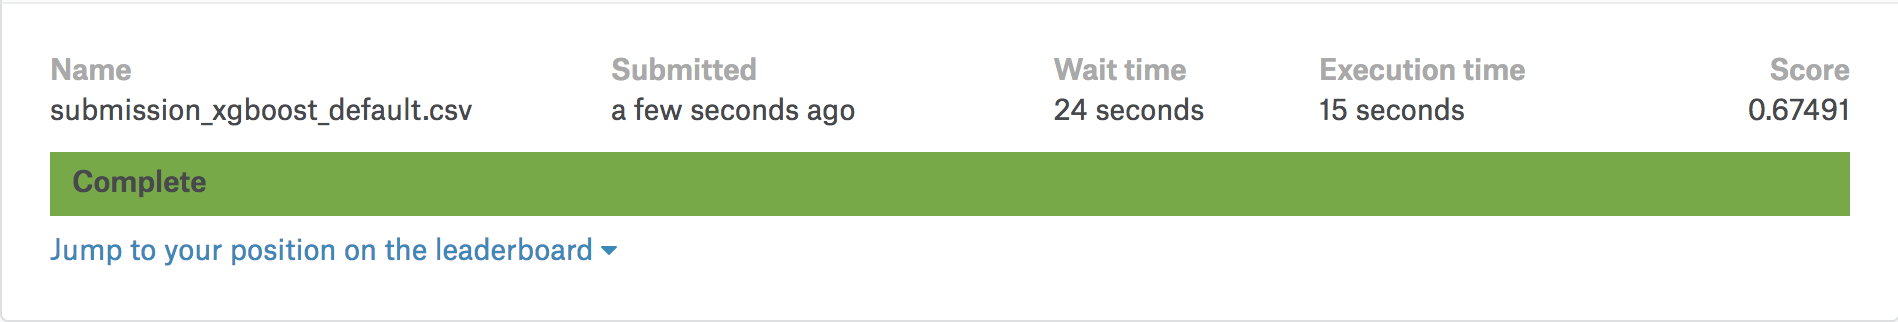

# 3.2. Conclusion

##### 3.2.1. Summary

- Walmart의 상품 카테고리의 관한 정보(DepartmentDescription, FinelineNumber, Upc)와 고객의 물품 구매/환불 기록과 날짜(ScanCount, Weekday) 정보를 가지고 TripType(고객유형)을 분류해보았다.

## 분류를 위한 도메인 지식과 보편적 지식을 통한 가정

1. 평소 구매자로서의 경험지식 사용
    - 같은 카테고리 내의 물품들 중 가장 많이 팔리는 것이 팔릴 확률이 가장 높을 것이다.
    - 같은 고객은 자주 사던 물품을 살 확률이 가장 높을 것이다.

2. 카테고리 안에 모든 정보를 사용

    - TripType별로 고객이 구매하는 상품 카테고리가 다를 것이다.
    - 상품 카테고리가 세분화 될 수록 TripType을 좀 더 정확하게 예측할 수 있을 것이다.

##### 3.2.1. Summary
3. Interaciotn을 위한 Tree 기반 모델 사용

    - 선택된 10425개의 feature들 간에 interaction이 필요하다고 생각하여 이러한 부분을 직관적으로 이해할 수 있는 트리기반 모델을 사용하였다.
    - 다수의 트리를 사용하는 모델을 사용하면 엔트로피에 의해 노드가 나눠질 때 각 트리마다 다르게 다양한 노드로 나눠지기 때문에 feature들 간의 interaction이 충분히 고려될 것이다.
    
    
4. Xgboost

    - tree 기반 부스팅이며, 앞 모델(tree)에서 놓친 feature를 뒤에 오는 보완해주는 모델(tree)에서 잡아줄 것이다.

##### 3.2.2. Conclusion
## xgboost depth 15
 - n_estimator 100
 - max_depth 15
 - objective= 'multi:softprob'
 - eval_metric = 'mlogloss'
 

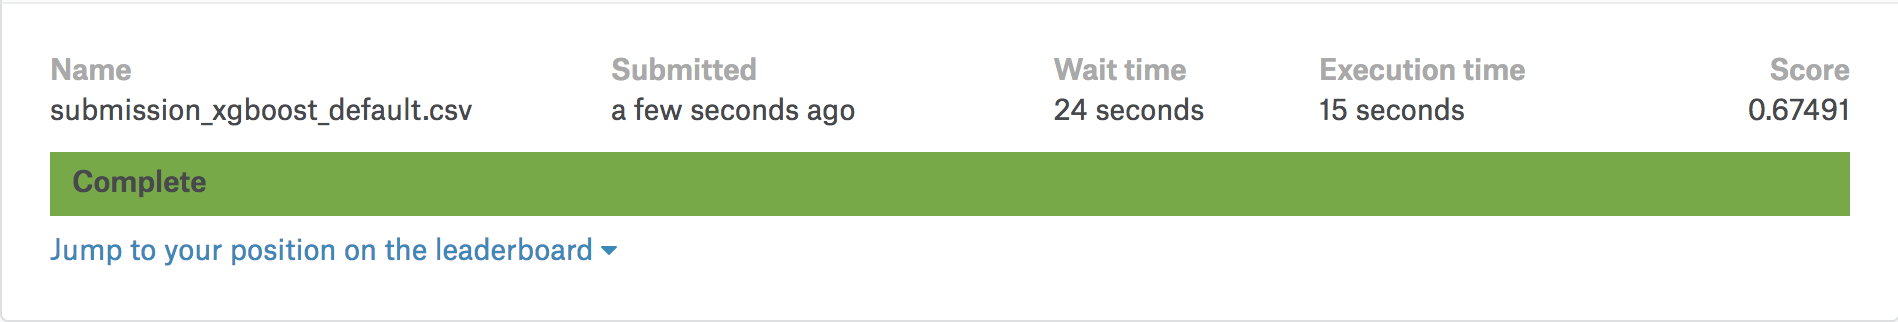

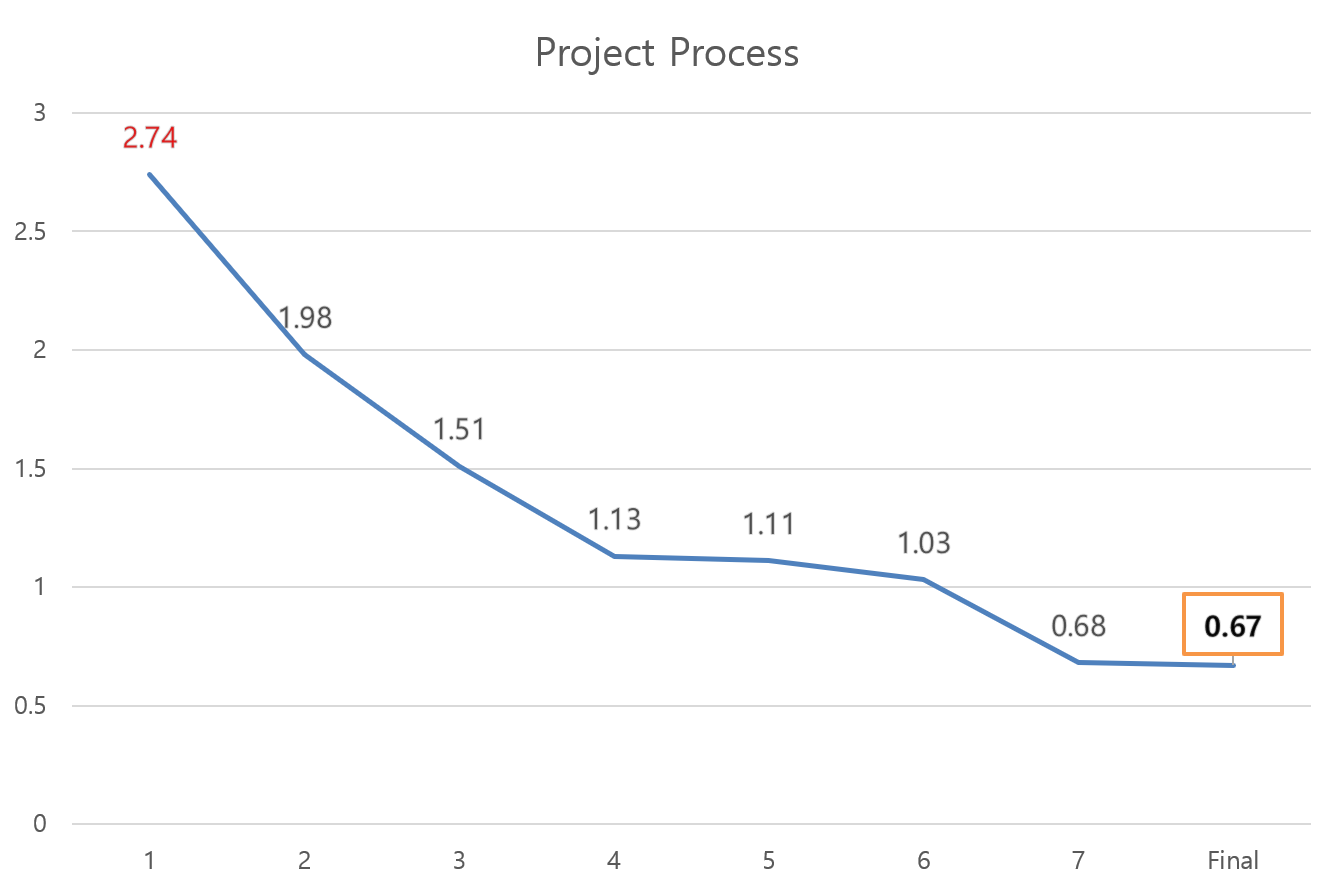